<a href="https://colab.research.google.com/github/julmiha25-sys/Python/blob/main/Pandas/%D0%A0%D0%B0%D1%81%D1%87%D0%B5%D1%82%20%D0%B4%D0%B8%D0%BD%D0%B0%D0%BC%D0%B8%D0%BA%D0%B8%20%D0%BF%D1%80%D0%BE%D0%B4%D0%B0%D0%B6%20%20%D1%80%D0%B0%D0%B7%D0%BD%D1%8B%D0%BC%D0%B8%20%D1%81%D0%BF%D0%BE%D1%81%D0%BE%D0%B1%D0%B0%D0%BC%D0%B8/%D0%A0%D0%B0%D1%81%D1%87%D0%B5%D1%82_%D0%B4%D0%B8%D0%BD%D0%B0%D0%BC%D0%B8%D0%BA%D0%B8_%D0%BF%D1%80%D0%BE%D0%B4%D0%B0%D0%B6_%D0%B2_%D0%B0%D0%BF%D1%82%D0%B5%D0%BA%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

,revenue,revenue_rolling,revenue_shift,revenue_shifted,revenue_pct_change
DR_Dat,,,,,
2022-08-01,84681.52,NaN,NaN,NaN,NaN
2022-08-02,71389.37,-0.16,84681.52,-0.16,-0.16
2022-08-03,78050.82,0.09,71389.37,0.09,0.09
2022-08-04,59187.36,-0.24,78050.82,-0.24,-0.24
2022-08-05,56458.81,-0.05,59187.36,-0.05,-0.05


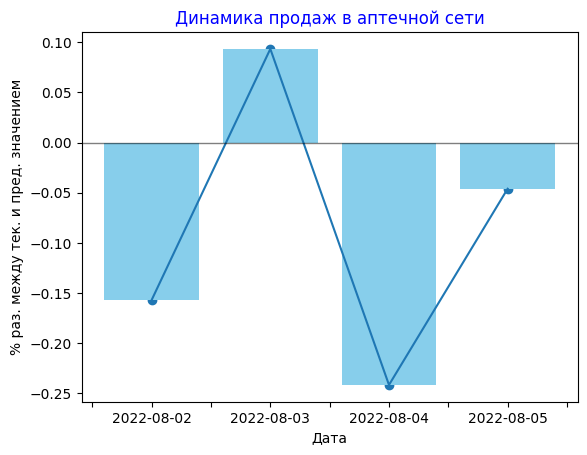

In [27]:
# Расчет динамики продаж  разными способами
import pandas as pd
df=pd.read_csv('data1.csv',encoding='1251', delimiter=',')
pd.set_option('display.max_columns',25)
pd.set_option('display.float_format','{:.2f}'.format)
# Расчет выручки
df=df.groupby('DR_Dat')[['DR_Kol', 'DR_CRoz', 'DR_SDisc']].apply(lambda x: pd.Series({'revenue': sum(x['DR_Kol']*x['DR_CRoz']-x['DR_SDisc'])}))
df.reset_index()
# Расчет при помощи rolling (обращение к элементам из окна)
df['revenue_rolling']=df['revenue'].rolling(2).apply(lambda x: (x.iloc[1]-x.iloc[0])/x.iloc[0])
# Расчет при помощи shift - сдвига
df['revenue_shift']=df['revenue'].shift(1)
df['revenue_shifted']=(df['revenue']-df['revenue_shift'])/df['revenue_shift']
# Расчет при помощи pct_change - % разности между текущим и предыдущим значением
df['revenue_pct_change']=df['revenue'].pct_change(1)
df

# Визуализация
import pandas as pd
import matplotlib.pyplot as plt
df['revenue_pct_change'].plot(kind='line')
plt.scatter(df.index,df['revenue_pct_change'])
plt.title('Динамика продаж в аптечной сети',color='blue')
plt.xlabel('Дата')
plt.ylabel('% раз. между тек. и пред. значением')
plt.bar(range(len(df)), df['revenue_pct_change'], color='skyblue')
plt.axhline(y=0, color='black', linewidth=1, linestyle='-', alpha=0.5)
df
